In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [2]:
hr_data=pd.read_csv("heartRisk.csv")

In [3]:
hr_data.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1


In [4]:
hr_data.shape

(1000, 10)

In [5]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isMale          1000 non-null   int64  
 1   isBlack         1000 non-null   int64  
 2   isSmoker        1000 non-null   int64  
 3   isDiabetic      1000 non-null   int64  
 4   isHypertensive  1000 non-null   int64  
 5   Age             1000 non-null   int64  
 6   Systolic        1000 non-null   int64  
 7   Cholesterol     1000 non-null   int64  
 8   HDL             1000 non-null   int64  
 9   Risk            1000 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 78.2 KB


In [6]:
hr_data.describe()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.49000,0.530000,0.516000,0.522000,0.495000,59.107000,144.249000,164.043000,59.603000,19.667000
std,0.50015,0.499349,0.499994,0.499766,0.500225,11.536492,31.774528,20.329891,23.863505,17.043941
min,0.00000,0.000000,0.000000,0.000000,0.000000,40.000000,90.000000,130.000000,20.000000,0.100000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,49.000000,117.000000,146.000000,39.000000,6.300000
50%,0.00000,1.000000,1.000000,1.000000,0.000000,59.000000,144.000000,164.000000,59.000000,14.400000
75%,1.00000,1.000000,1.000000,1.000000,1.000000,69.000000,171.000000,182.000000,81.000000,29.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,79.000000,200.000000,200.000000,100.000000,85.400000


In [7]:
num_attr=['Age','Systolic','Cholesterol','HDL']
target='Risk'

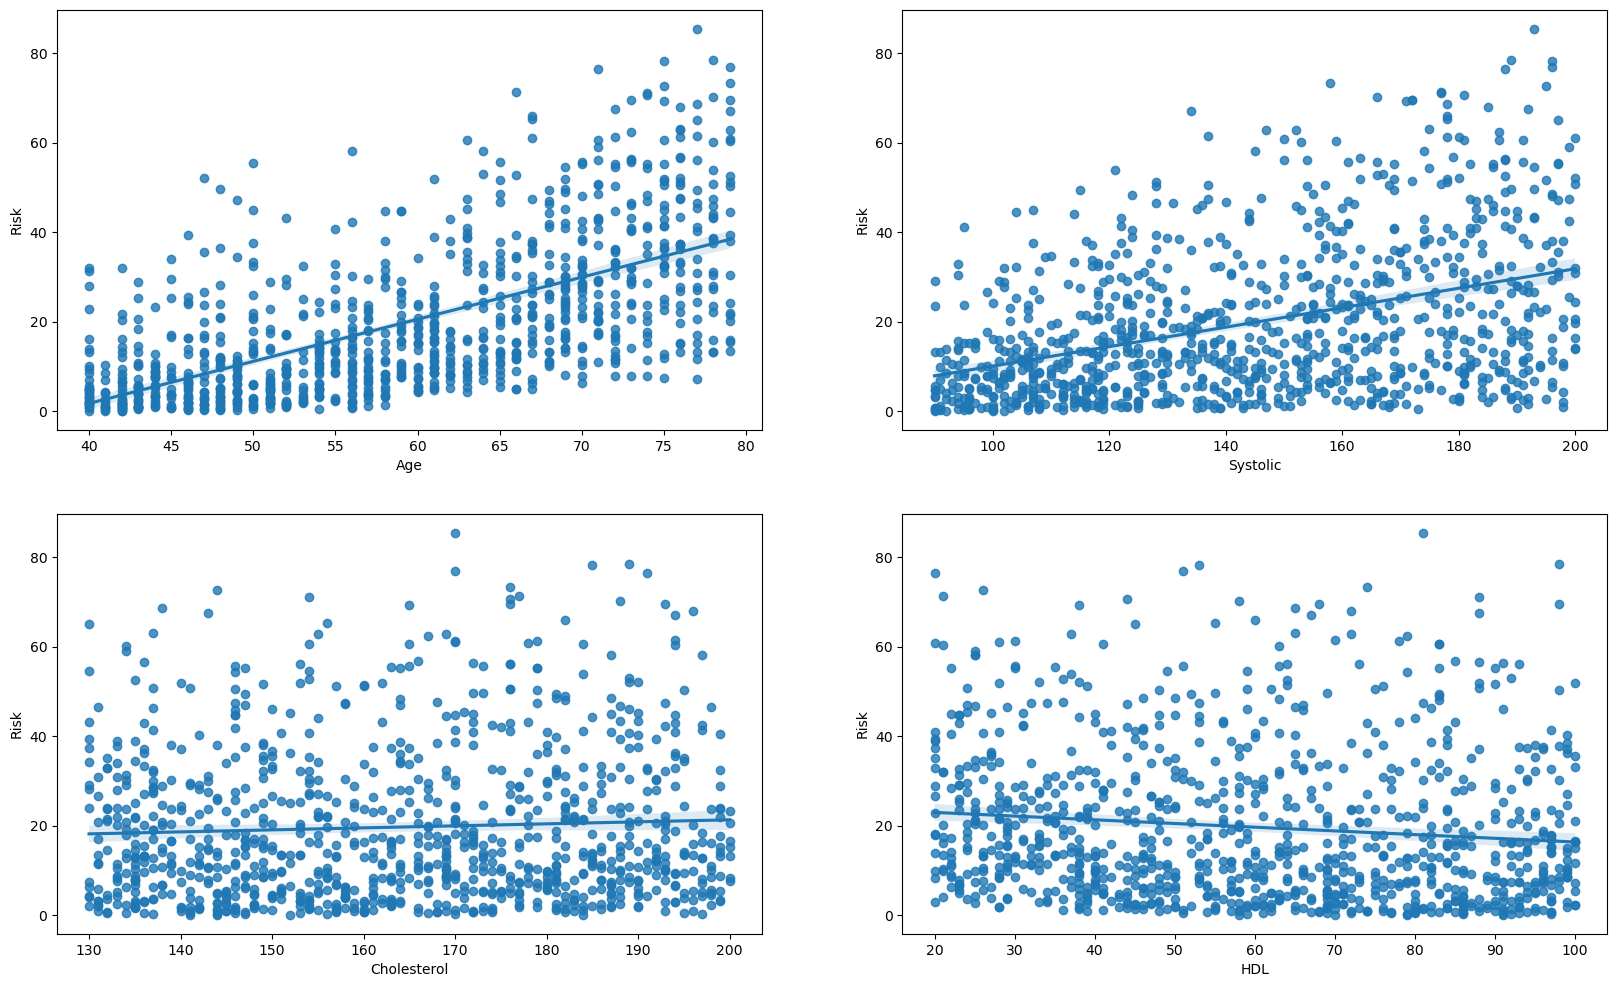

In [8]:
plt.figure(figsize=(20,12))
for i in range(len(num_attr)):
    plt.subplot(2,2,i+1)
    sns.regplot(x=num_attr[i],y='Risk',data=hr_data)
plt.show()

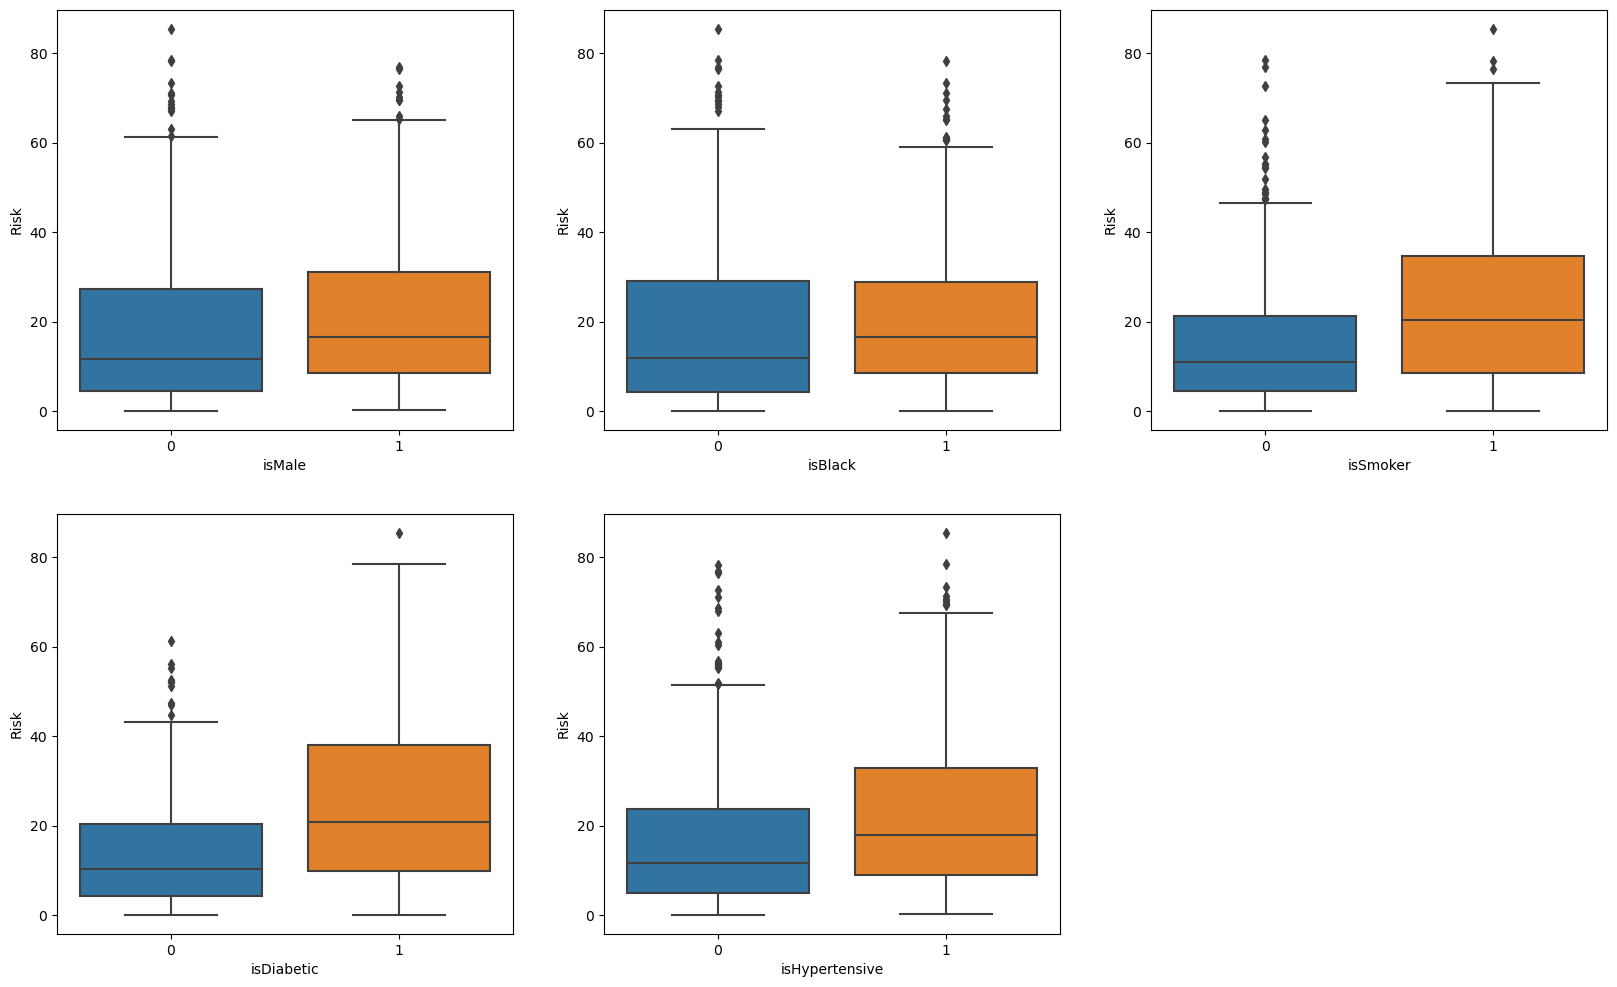

In [9]:
cat_cols=['isMale','isBlack','isSmoker','isDiabetic','isHypertensive']
plt.figure(figsize=(20, 12))
for i in range(len(cat_cols)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = cat_cols[i], y = 'Risk', data = hr_data)
plt.show()

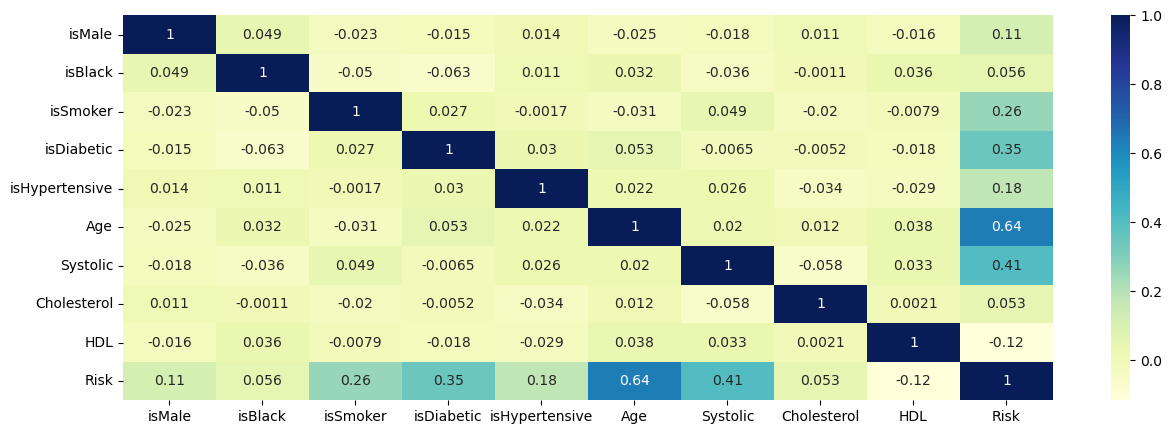

In [10]:
plt.figure(figsize=(15,5))
sns.heatmap(hr_data.corr(),annot=True,cmap='YlGnBu')
plt.show()

# Splitting data into Training and Testing Sets

In [11]:
df_train, df_test = train_test_split(hr_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [12]:
scaler = MinMaxScaler()

In [13]:
num_vars1=['Age','Systolic','Cholesterol','HDL','Risk']
df_train[num_vars1]=scaler.fit_transform(df_train[num_vars1])
df_train.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
420,1,0,0,0,0,0.512821,0.236364,0.257143,0.6125,0.050410
278,1,1,1,0,1,0.769231,0.272727,0.657143,0.8000,0.270809
218,0,0,0,1,0,0.435897,0.809091,0.785714,0.0000,0.212192
363,1,1,0,1,0,0.512821,0.609091,0.628571,0.3125,0.242673
850,1,1,1,1,0,0.692308,1.000000,0.571429,0.1000,0.715123


In [14]:
df_train.describe()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.484286,0.540000,0.507143,0.532857,0.480000,0.487106,0.489468,0.500551,0.492554,0.226466
std,0.500110,0.498754,0.500306,0.499276,0.499957,0.300244,0.288305,0.288339,0.301283,0.196537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769,0.245455,0.253571,0.225000,0.072392
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.487179,0.490909,0.514286,0.487500,0.166471
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.743590,0.729545,0.757143,0.762500,0.336460
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
y_train = df_train['Risk']
X_train = df_train.drop('Risk',axis=1)

# Feature Selection using RFE 

In [16]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=9)             
rfe = rfe.fit(X_train, y_train)

In [17]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('isMale', True, 1),
 ('isBlack', True, 1),
 ('isSmoker', True, 1),
 ('isDiabetic', True, 1),
 ('isHypertensive', True, 1),
 ('Age', True, 1),
 ('Systolic', True, 1),
 ('Cholesterol', True, 1),
 ('HDL', True, 1)]

In [18]:
col = X_train.columns[rfe.support_]
col

Index(['isMale', 'isBlack', 'isSmoker', 'isDiabetic', 'isHypertensive', 'Age',
       'Systolic', 'Cholesterol', 'HDL'],
      dtype='object')

In [19]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [20]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL
420,1,0,0,0,0,0.512821,0.236364,0.257143,0.6125
278,1,1,1,0,1,0.769231,0.272727,0.657143,0.8000
218,0,0,0,1,0,0.435897,0.809091,0.785714,0.0000
363,1,1,0,1,0,0.512821,0.609091,0.628571,0.3125
850,1,1,1,1,0,0.692308,1.000000,0.571429,0.1000


# Building model using statsmodel, for the detailed statistics


In [21]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [22]:
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [23]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Risk   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     302.4
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          1.07e-232
Time:                        20:25:30   Log-Likelihood:                 705.43
No. Observations:                 700   AIC:                            -1391.
Df Residuals:                     690   BIC:                            -1345.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2869      0.014    -20.

In [24]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Systolic,3.28
7,Cholesterol,3.26
8,HDL,3.23
5,Age,3.16
1,isBlack,2.06
3,isDiabetic,2.01
2,isSmoker,1.93
0,isMale,1.83
4,isHypertensive,1.81


# Residual Analysis of the train data

In [26]:
y_train_price = lm.predict(X_train_rfe)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Lakshman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

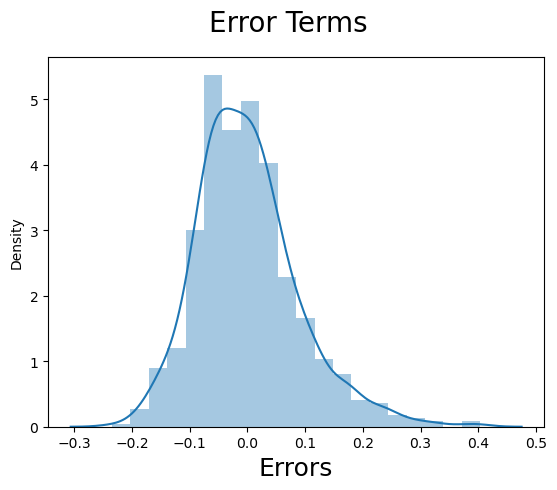

In [28]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

# Making Predictions

In [29]:
scaler = MinMaxScaler()

# Applying the scaling on the test sets

In [30]:
df_test[num_vars1] = scaler.fit_transform(df_test[num_vars1])

# Dividing into X_test and y_test

In [31]:
y_test = df_test.pop('Risk')
X_test = df_test

In [32]:
X_test_new = sm.add_constant(X_test)

In [33]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

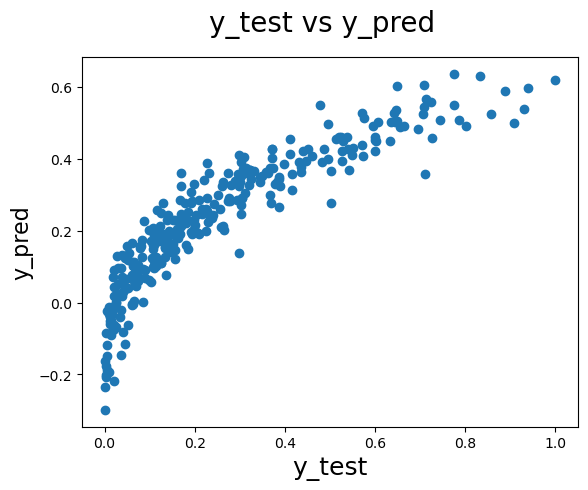

In [34]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [35]:
from sklearn.metrics import r2_score

#Checking the R-squared on the test set

r_squared = r2_score(y_test, y_pred)
r_squared

0.7745430765700659